In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('heart.csv') 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


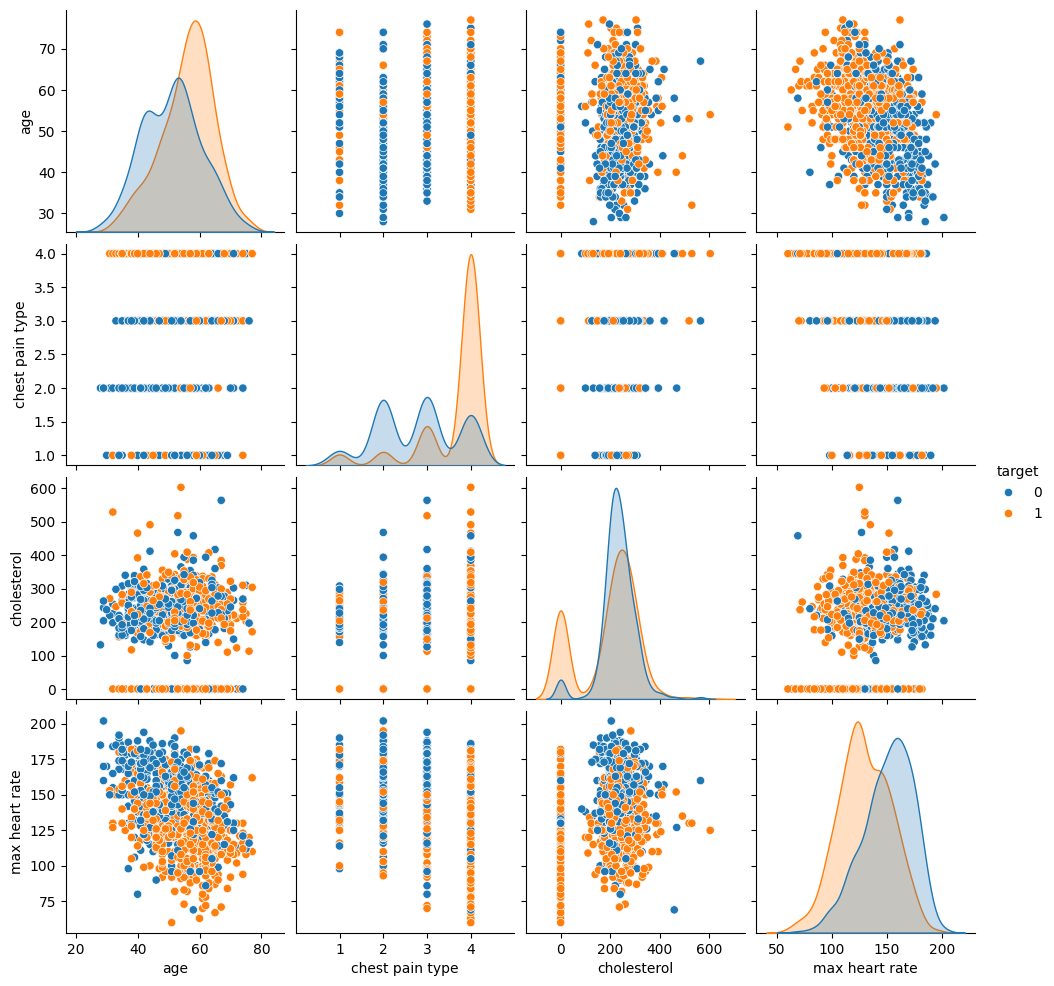

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quick data visualization using a pairplot on selected features
sns.pairplot(df, hue='target', vars=['age', 'chest pain type', 'cholesterol', 'max heart rate'])
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Prepare features and target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

results = {}
scalers = {
    'Initial': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

for name, scaler in scalers.items():
    if scaler:
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test
    model = SVC()
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    results[name] = acc

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.index.name = 'Data Version'
print(results_df)
# Comment: The accuracy table shows how different scaling methods affect SVM performance.

                Accuracy
Data Version            
Initial         0.725490
StandardScaler  0.885154
MinMaxScaler    0.885154
MaxAbsScaler    0.882353


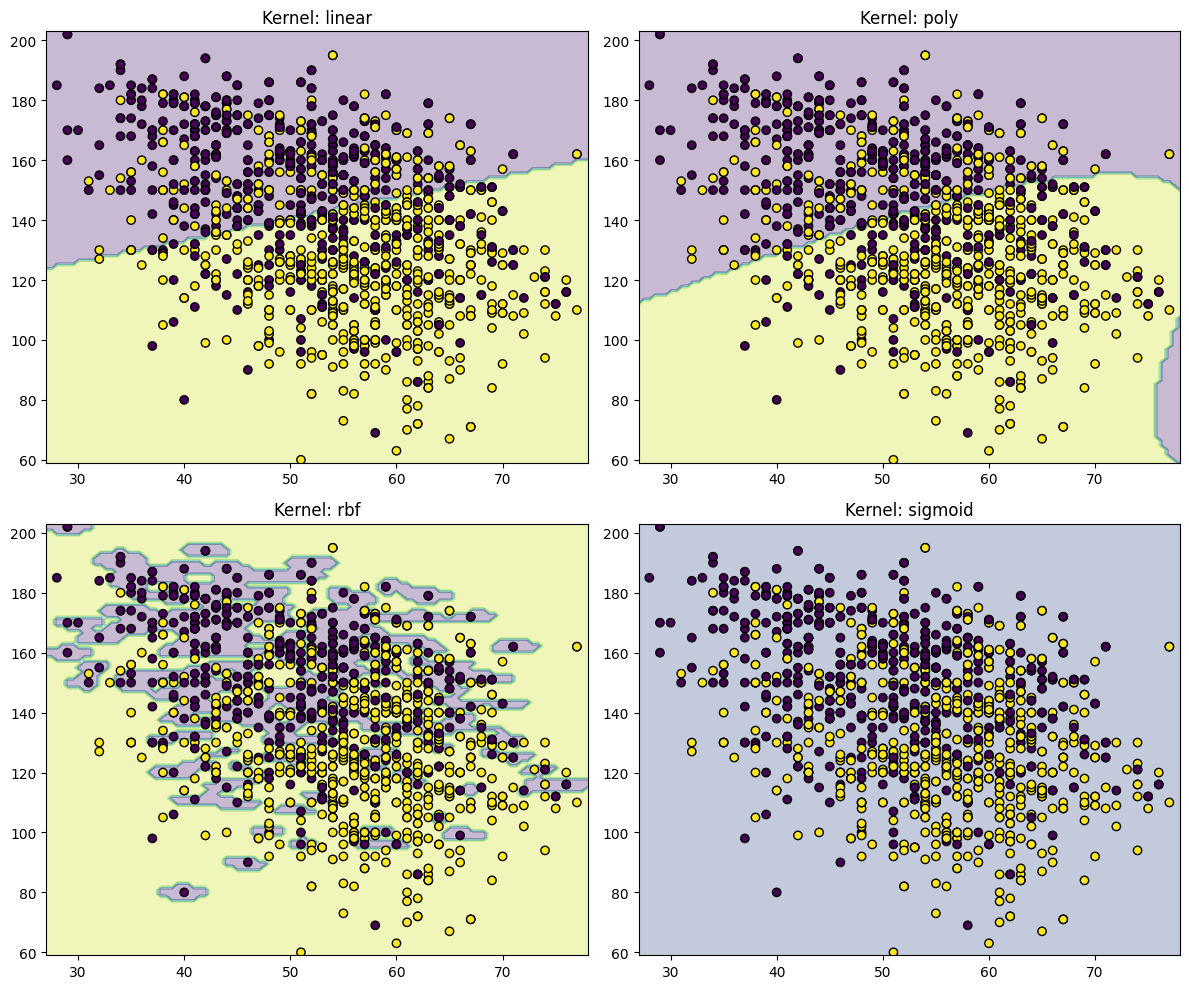

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Choose two features for visualizing decision boundaries
features = ['age', 'max heart rate']
X_vis = df[features].values
y_vis = df['target'].values
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure(figsize=(12, 10))
for i, kernel in enumerate(kernels, 1):
    # svc = SVC(kernel=kernel, degree=3 if kernel=='poly' else None, gamma='auto')
    svc = SVC(kernel=kernel, degree=3 if kernel=='poly' else 3, gamma='auto')
    svc.fit(X_train_vis, y_train_vis)
    
    # Define a mesh for plotting decision boundaries
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k')
    plt.title(f'Kernel: {kernel}')

plt.tight_layout()
plt.show()
# Comment: The overlaid decision boundary plots reveal differences in class separation using various kernels.